# Following Along YouTube Tutorial

### Making our splitting function. 

In [1]:
# Import 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random 
from pprint import pprint

In [2]:
# Load the data. 

data = pd.read_csv('iris.csv')

In [3]:
# Check out the data to make sure. 

data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
# Check for any null values. 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
# Now we break the data in to a train and a test split. 

# Define our function. 

def train_test_split(data, test_size):
    
    # Setting the test_size
    
    if isinstance(test_size, float):
        test_size = round(test_size * len(data)) 
        
        # Create a list of indices to pick from to create our train test split.
        
    indices = data.index.tolist()
    
    # Randomly select
    
    test_indices = random.sample(population=indices, k= test_size)
    
    # Now we can create our test dataset.
    
    test_data = data.loc[test_indices]
    train_data = data.drop(test_indices)

    return train_data, test_data

In [6]:
# Use our function. 

train_data, test_data = train_test_split(data, test_size=0.1)

In [7]:
# Let us check. 

test_data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
141,6.9,3.1,5.1,2.3,Virginica
66,5.6,3.0,4.5,1.5,Versicolor
86,6.7,3.1,4.7,1.5,Versicolor
148,6.2,3.4,5.4,2.3,Virginica
128,6.4,2.8,5.6,2.1,Virginica


In [8]:
# We will store the data in a array to make the algorithm run faster. 

train_data_values = train_data.values

In [22]:
# Check if a partition has more than one class present. 

def check_pure(data):
    
    # Want only the last col
    
    labels = data[:, -1]
    unique_classes = np.unique(labels)
    
    # See if there is only one class present or not. 
    
    if len(unique_classes) == 1:
        return True 
    else:
        return False 

In [30]:
# Lets give it a test run on the data. 


print("Run on the origional data --> ", check_pure(train_data_values))

# now it should be True

print("Run on filtered data --> ",check_pure(train_data[train_data['variety'] == "Setosa"].values))

Run on the origional data -->  False
Run on filtered data -->  True


In [41]:
# Here we create a function to classify the data fed in. 

def classify_data(data):
    
    # To get the classes.
    
    labels = train_data_values[:, -1]
    unique_classes, counts_unique_classes = np.unique(labels, return_counts= True)
    
    # To find the most prevalent class in the entries. 

    index = counts_unique_classes.argmax()
    
    return unique_classes[index]

In [46]:
# Test it on some data. Answer should be setosa. 

classify_data(train_data[train_data['petal.width'] < 1.2].values)

'Setosa'

In [54]:
# define the split function

def split_point(data):
    
    # Interested in the column parameter. 
    
    # Want it to be a dictionary. 

    potential_splits = {}
    _, n_col = data.shape 
    
    for col_index in range(n_col - 1):
        #Create our potential split for each column. 
        potential_splits[col_index] = []
        values = data[:, col_index]
        unique_values = np.unique(values)
        
        # We want to create splitting values whcih is what this for loop is getting at. 
        for index in range(len(unique_values)):
            if index != 0:
                current_value = unique_values[index]
                previous_value = unique_values[index -1]
                potential_split = (current_value + previous_value)/ 2
                
                potential_splits[col_index].append(potential_split)
    
    return potential_splits

In [56]:
# Test it out. 

potential_splits = split_point(train_data.values)

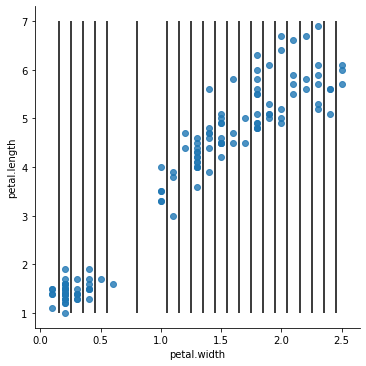

In [63]:
# We will plot it out to see. 

sns.lmplot(data = train_data, x = 'petal.width', y = 'petal.length', fit_reg= False, )

# Drawing our vertical lines.

plt.vlines(x = potential_splits[3],ymin=1, ymax=7 )